In [ ]:
"""
This notebook generates site saturation mutagenesis for the TATA box (Fig. 7B).
"""

In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "mutagenesis.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/mutagenesis.tar.gz -P /Users/adamhe/github/scratch
tar -cvzf /Users/adamhe/github/scratch/mutagenesis.tar.gz


In [10]:
# Load and process point mutation/saturation mutagenesis data

corr = np.load(
    os.path.join(SCRATCH, "mutagenesis/tata/ensemble_tata_point_mutation_corr.npz"),
)["arr_0"]
log_quantity = np.load(
    os.path.join(SCRATCH, "mutagenesis/tata/ensemble_tata_point_mutation_log_quantity.npz"),
)["arr_0"][:, :, :, 0]

mean_corr = pd.DataFrame(corr.mean(axis=1).T, index=["A", "C", "G", "T"]).iloc[:, range(1, 9)]
mean_log_quantity = pd.DataFrame(log_quantity.mean(axis=1).T, index=["A", "C", "G", "T"]).iloc[:, range(1, 9)]

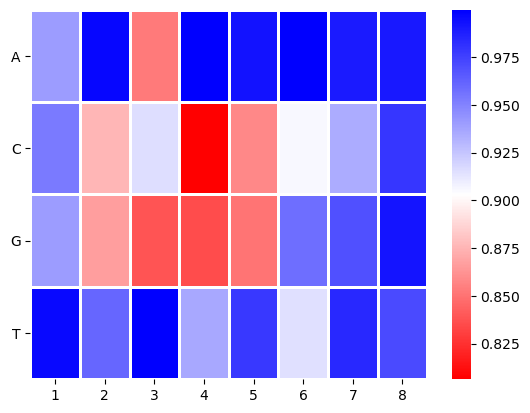

In [11]:
sns.heatmap(mean_corr.sort_index(), linewidth=1, cmap="bwr_r")
plt.yticks(rotation=0)
plt.savefig("img/tata_point_mutation_corr.pdf", bbox_inches="tight")

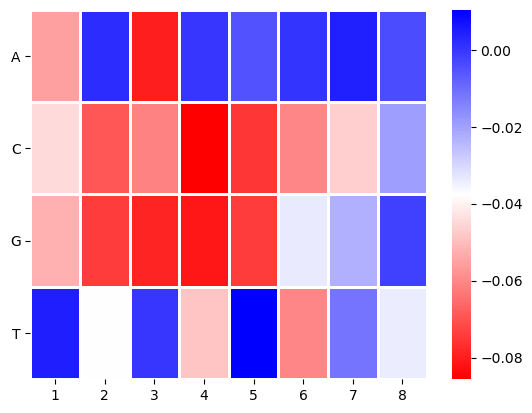

In [12]:
sns.heatmap(mean_log_quantity.sort_index(), linewidth=1, cmap="bwr_r")
plt.yticks(rotation=0)
plt.savefig("img/tata_point_mutation_log_quantity.pdf", bbox_inches="tight")